In [1]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from datetime import date
import matplotlib.pyplot as plt

# step 1: import data

In [2]:
data = pd.read_csv('C:/Users/wuhao/Desktop/springboard/example/lecture02/news stock/input/Combined_News_DJIA.csv')

In [3]:
# we want to see the data head
data.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

### the label 1 means that the DJIA has closed at postive, 0 for negative.

### we merge all the news data  for further analysis

In [4]:
data["combined_news"] = data.filter(regex =("Top.*")).apply(lambda x: ''.join(str(x.values)), axis = 1)

In [5]:
data["combined_news"].head()

0    ['b"Georgia \'downs two Russian warplanes\' as...
1    ["b'Why wont America and Nato help us? If they...
2    ["b'Remember that adorable 9-year-old who sang...
3    ["b' U.S. refuses Israel weapons to attack Ira...
4    ["b'All the experts admit that we should legal...
Name: combined_news, dtype: object

# step 2: split the data into train, test set 

In [6]:
train = data[data['Date'] < '2015-01-01']
test = data[data['Date'] > '2014-12-31']

# step 3: feature engineering 

In [7]:
feature_extraction = TfidfVectorizer()
#transfer X_train, X_test

X_train = feature_extraction.fit_transform(train["combined_news"].values)
X_test = feature_extraction.transform(test["combined_news"].values)

In [8]:
# prepare y_train, y_test 
y_train = train["Label"].values
y_test = test["Label"].values

# step 4: train model

In [9]:
clf = SVC(probability=True, kernel = 'rbf')
clf.fit(X_train, y_train)

SVC(probability=True)

# step 5: prediction 

In [10]:
predictions = clf.predict_proba(X_test)


In [11]:
fpr,tpr,thresholds = roc_curve(y_test, predictions[:,1])
roc_auc = auc(fpr,tpr)


<Figure size 432x288 with 0 Axes>

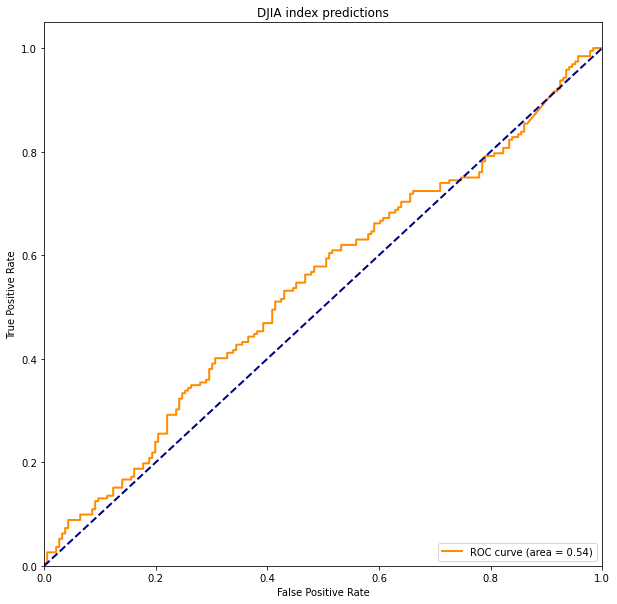

In [12]:
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DJIA index predictions')
plt.legend(loc="lower right")
plt.show()


In [13]:
print('ROC-AUC yields ' + str(roc_auc_score(y_test, predictions[:,1])))

ROC-AUC yields 0.5395105286738351


# step 6: further optimization

### split large tokens into small tokens

In [14]:

X_train = train["combined_news"].str.lower().str.replace('"', ' ').str.split()
X_test = test["combined_news"].str.lower().str.replace('"', ' ').str.split()
print(X_test[1611])

["['most", 'cases', 'of', 'cancer', 'are', 'the', 'result', 'of', 'sheer', 'bad', 'luck', 'rather', 'than', 'unhealthy', 'lifestyles,', 'diet', 'or', 'even', 'inherited', 'genes,', 'new', 'research', 'suggests.', 'random', 'mutations', 'that', 'occur', 'in', 'dna', 'when', 'cells', 'divide', 'are', 'responsible', 'for', 'two', 'thirds', 'of', 'adult', 'cancers', 'across', 'a', 'wide', 'range', 'of', "tissues.'", "'iran", 'dismissed', 'united', 'states', 'efforts', 'to', 'fight', 'islamic', 'state', 'as', 'a', 'ploy', 'to', 'advance', 'u.s.', 'policies', 'in', 'the', 'region:', 'the', 'reality', 'is', 'that', 'the', 'united', 'states', 'is', 'not', 'acting', 'to', 'eliminate', 'daesh.', 'they', 'are', 'not', 'even', 'interested', 'in', 'weakening', 'daesh,', 'they', 'are', 'only', 'interested', 'in', 'managing', 'it', "'", "'poll:", 'one', 'in', '8', 'germans', 'would', 'join', 'anti-muslim', "marches'", 'uk', 'royal', "family's", 'prince', 'andrew', 'named', 'in', 'us', 'lawsuit', 'ove

###  delete stop words

In [15]:
from nltk.corpus import stopwords


In [16]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wuhao\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\wuhao\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


###  delete numbers

In [17]:
import re 
def hasNumbers(inputString):
    return bool(re.search(r'\d', inputString))

###  put those method together 

In [18]:
def check(word):   
    if hasNumbers(word):
        return False
    elif word in stop:
        return False
    else:
        return True

In [19]:
X_train = X_train.apply(lambda x: [item for item in x if check(item)])
X_test = X_test.apply(lambda x: [item for item in x if check(item)])
print(X_test[1611])

["['most", 'cases', 'cancer', 'result', 'sheer', 'bad', 'luck', 'rather', 'unhealthy', 'lifestyles,', 'diet', 'even', 'inherited', 'genes,', 'new', 'research', 'suggests.', 'random', 'mutations', 'occur', 'dna', 'cells', 'divide', 'responsible', 'two', 'thirds', 'adult', 'cancers', 'across', 'wide', 'range', "tissues.'", "'iran", 'dismissed', 'united', 'states', 'efforts', 'fight', 'islamic', 'state', 'ploy', 'advance', 'u.s.', 'policies', 'region:', 'reality', 'united', 'states', 'acting', 'eliminate', 'daesh.', 'even', 'interested', 'weakening', 'daesh,', 'interested', 'managing', "'", "'poll:", 'one', 'germans', 'would', 'join', 'anti-muslim', "marches'", 'uk', 'royal', "family's", 'prince', 'andrew', 'named', 'us', 'lawsuit', 'underage', 'sex', 'allegations', "'some", 'asylum-seekers', 'refused', 'leave', 'bus', 'arrived', 'destination', 'rural', 'northern', 'sweden,', 'demanding', 'taken', 'back', 'malm', 'big', 'city', ".'", 'pakistani', 'boat', 'blows', 'self', 'india', 'navy', 

In [20]:
X_train = X_train.apply(lambda x: ' '.join(x))
X_test = X_test.apply(lambda x: ' '.join(x))
print(X_test[1611])

['most cases cancer result sheer bad luck rather unhealthy lifestyles, diet even inherited genes, new research suggests. random mutations occur dna cells divide responsible two thirds adult cancers across wide range tissues.' 'iran dismissed united states efforts fight islamic state ploy advance u.s. policies region: reality united states acting eliminate daesh. even interested weakening daesh, interested managing ' 'poll: one germans would join anti-muslim marches' uk royal family's prince andrew named us lawsuit underage sex allegations 'some asylum-seekers refused leave bus arrived destination rural northern sweden, demanding taken back malm big city .' pakistani boat blows self india navy chase. four people board vessel near pakistani port city karachi believed killed dramatic episode arabian sea new year's eve, according india's defence ministry. 'sweden hit third mosque arson attack week' cars set alight french new year' 'salaries top ceos rose twice fast average canadian since r

In [21]:
feature_extraction = TfidfVectorizer(lowercase=False)
X_train = feature_extraction.fit_transform(X_train.values)
X_test = feature_extraction.transform(X_test.values)

In [22]:
clf = SVC(probability=True, kernel='rbf')
clf.fit(X_train, y_train)
predictions = clf.predict_proba(X_test)
print('ROC-AUC yields ' + str(roc_auc_score(y_test, predictions[:,1])))

ROC-AUC yields 0.5604558691756273


In [23]:
fpr,tpr,thresholds = roc_curve(y_test, predictions[:,1])
roc_auc = auc(fpr,tpr)

<Figure size 432x288 with 0 Axes>

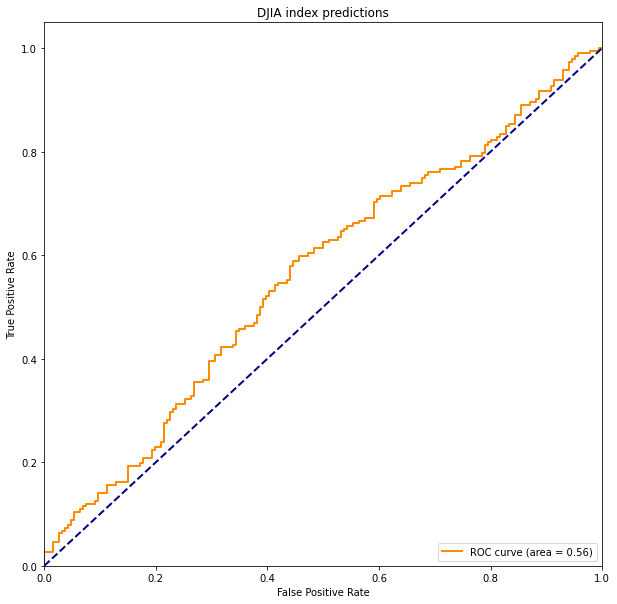

In [24]:
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DJIA index predictions')
plt.legend(loc="lower right")
plt.show()

## Better than before. After some optimization method, we have a better results.

### try RFC model instead

In [25]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
predictions = clf.predict_proba(X_test)
print('ROC-AUC yields ' + str(roc_auc_score(y_test, predictions[:,1])))

ROC-AUC yields 0.5079945116487455


<Figure size 432x288 with 0 Axes>

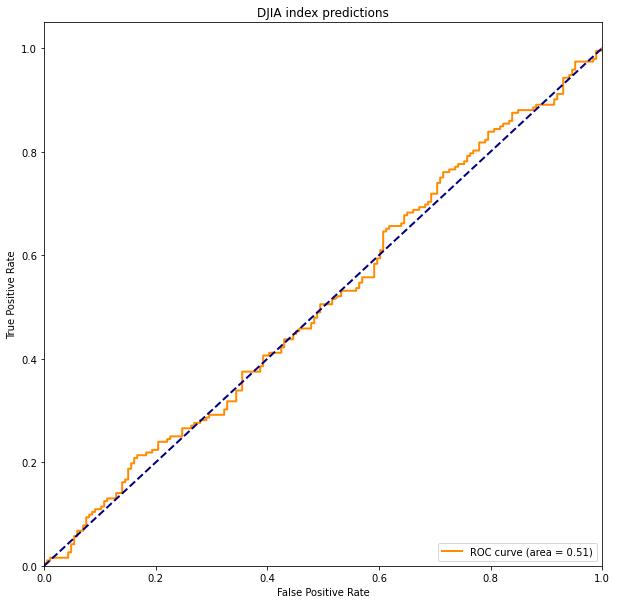

In [26]:
fpr,tpr,thresholds = roc_curve(y_test, predictions[:,1])
roc_auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DJIA index predictions')
plt.legend(loc="lower right")
plt.show()

## then we assumed that SVC model maybe better than RFC model here.